In [19]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [20]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/Traveldata_train.csv'
travel = pd.read_csv(path)
travel.shape

(94379, 9)

In [21]:
travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [22]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/surveydata_train.csv'
survey = pd.read_csv(path)
survey.shape

(94379, 17)

In [23]:
survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


# merging data

In [24]:
df = travel.merge(survey, how='outer', on='ID', indicator=True)
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,_merge
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,both
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,both
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,both
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,both
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,both


In [98]:
df.shape

(94379, 26)

In [25]:
df._merge.value_counts()

both          94379
left_only         0
right_only        0
Name: _merge, dtype: int64

The dataframes were merged perfectly. The datasets have the same unique IDs each.

We can proceed to work with only one df.

# EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  object  
 2   Customer_Type            85428 non-null  object  
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  object  
 5   Travel_Class             94379 non-null  object  
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  int64   
 10  Seat_Comfort             94318 non-null  object  
 11  Seat_Class               94379 non-null  object  
 12  Arrival_Time_Convenient  85449 non-null  object  
 13  Catering                 85638 non-null  object  
 14  Platfo

**The numeric columns are:** 
* 'ID',
* 'Age',
* 'Travel_Distance',
* 'Departure_Delay_in_Mins',
* 'Arrival_Delay_in_Mins',
* 'Overall_Experience'

**The categorical columns are:**
* 'Gender',
* 'Customer_Type',
* 'Type_Travel',
* 'Travel_Class',
* 'Seat_Comfort',
* 'Seat_Class',
* 'Arrival_Time_Convenient',
* 'Catering',
* 'Platform_Location',
* 'Onboard_Wifi_Service',
* 'Onboard_Entertainment',
* 'Online_Support',
* 'Ease_of_Online_Booking',
* 'Onboard_Service',
* 'Legroom',
* 'Baggage_Handling',
* 'CheckIn_Service',
* 'Cleanliness',
* 'Online_Boarding'

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


* **ID**: We don't care about this columns since it's unique for each entry.
* **Age**: Seems alright. Range is from 7-85 years.
* **Travel_Distance**: right skewed?
* **Departure_Delay_in_Mins**: right skewed. Max value is 1592 mins ~ 26 hours. What's up with that?
* **Arrival_Delay_in_Mins**: right skewed. Max value is 1592 mins ~ 26 hours. What's up with that?
* **Overall_Experience**: is the target variable so we're not interested. The dataset is balanced since the mean value is 0.54, meaning that 54% of the targets are 1s.

In [28]:
df.describe(include='object')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,94302,85428,85153,94379,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,2,2,2,2,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business Travel,Eco,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,47815,69823,58617,49342,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533


* **'Gender'**:
* **'Customer_Type'**:
* **'Type_Travel'**:
* **'Travel_Class'**:
* **'Seat_Comfort'**:
* **'Seat_Class'**:
* **'Arrival_Time_Convenient'**:
* **'Catering'**:
* **'Platform_Location'**:
* **'Onboard_Wifi_Service'**:
* **'Onboard_Entertainment'**:
* **'Online_Support'**:
* **'Ease_of_Online_Booking'**:
* **'Onboard_Service'**:
* **'Legroom'**:
* **'Baggage_Handling'**:
* **'CheckIn_Service'**:
* **'Cleanliness'**:
* **'Online_Boarding'**:

In [29]:
num_cols = df.describe().columns.tolist()
cat_cols = df.describe(include='object').columns.tolist()

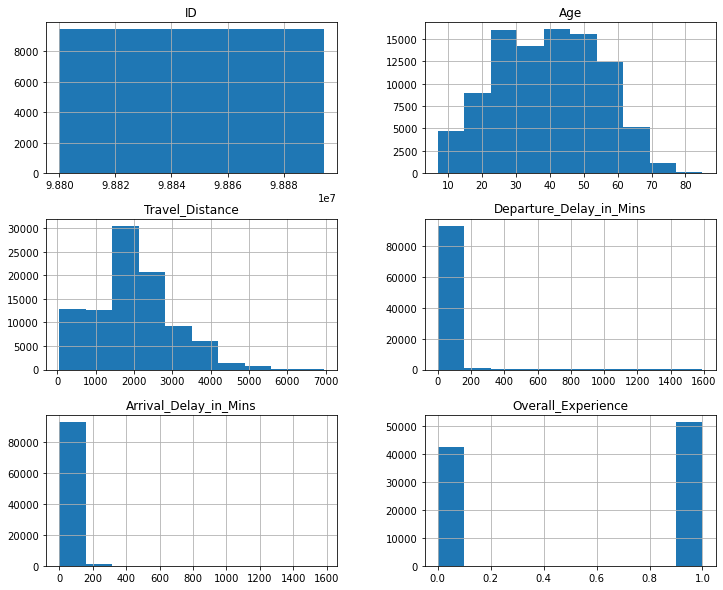

In [46]:
# showing numerical data
df[num_cols].hist(figsize=(12,10))
plt.show()

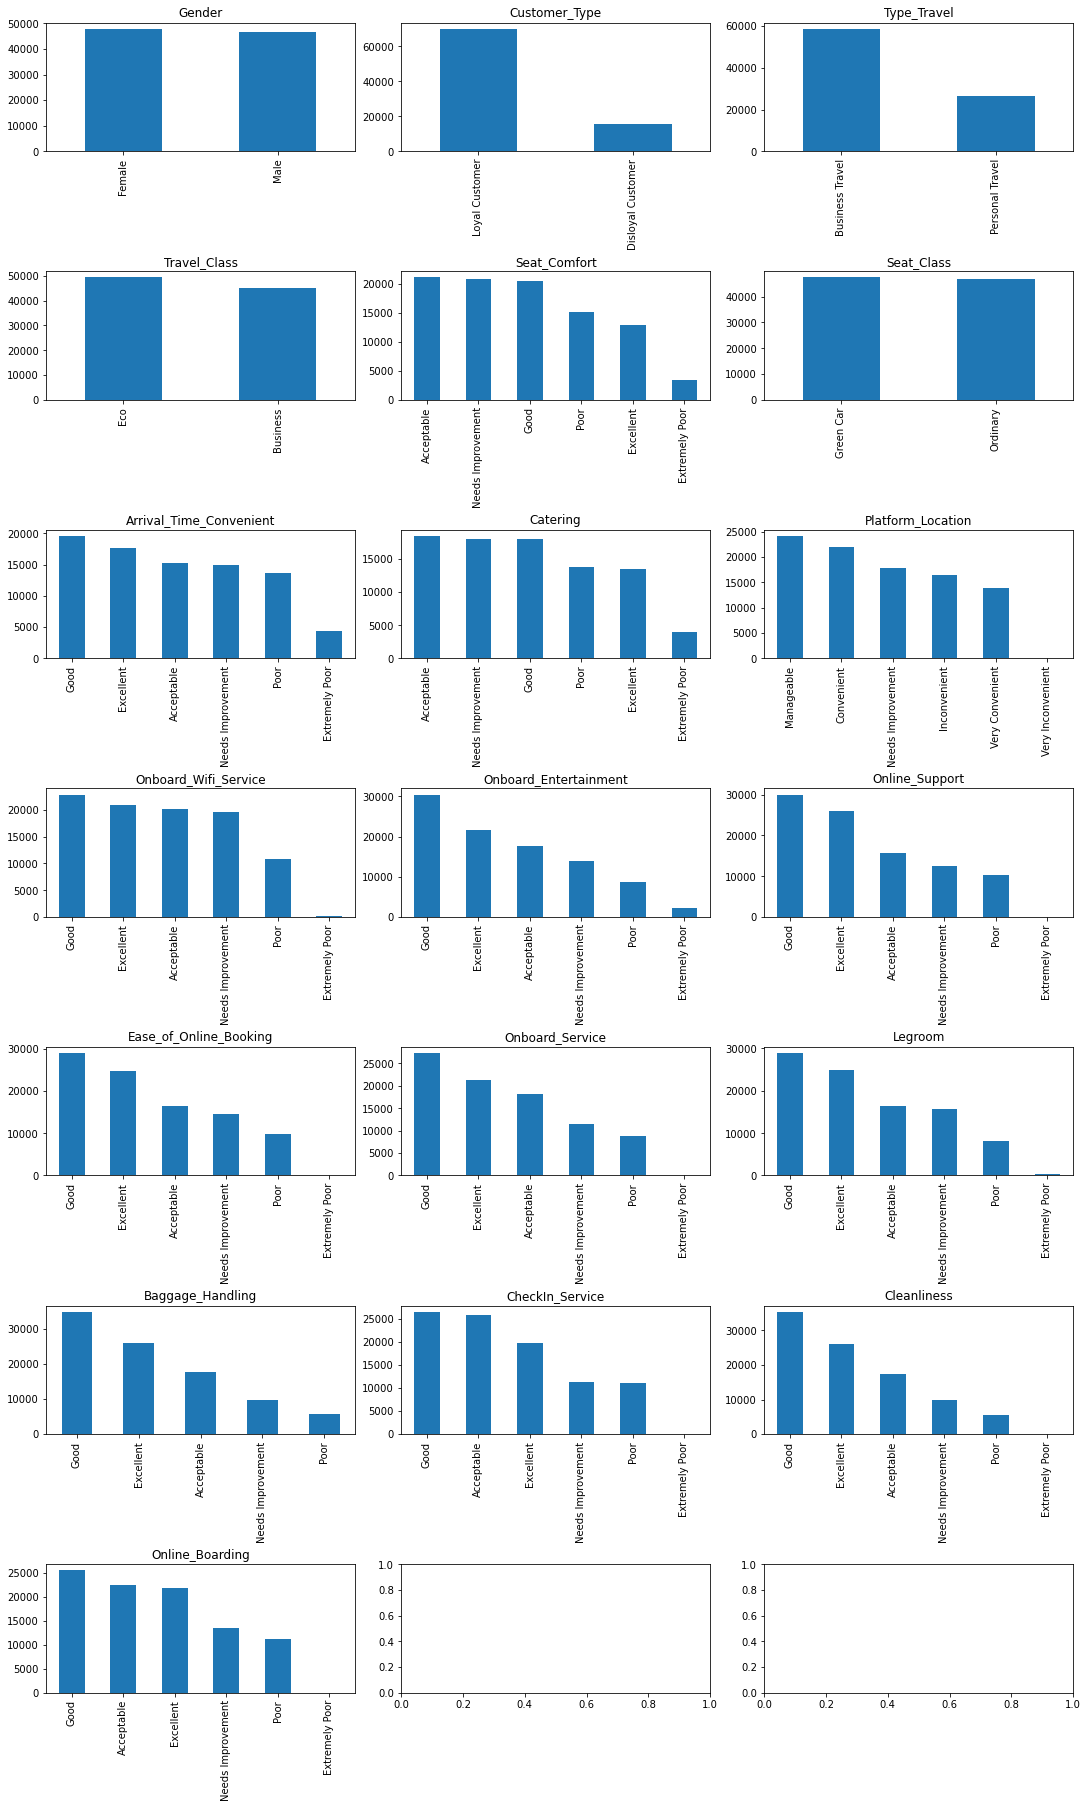

In [83]:
# assuming you have 12 columns:
fig,axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25), constrained_layout=True)

# use `select_dtypes` to filter instead of `describe`
for col, ax in zip(df.select_dtypes(include='O'), axes.ravel()):
    df[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)
    
plt.show()

## dealing with missing values

<AxesSubplot:>

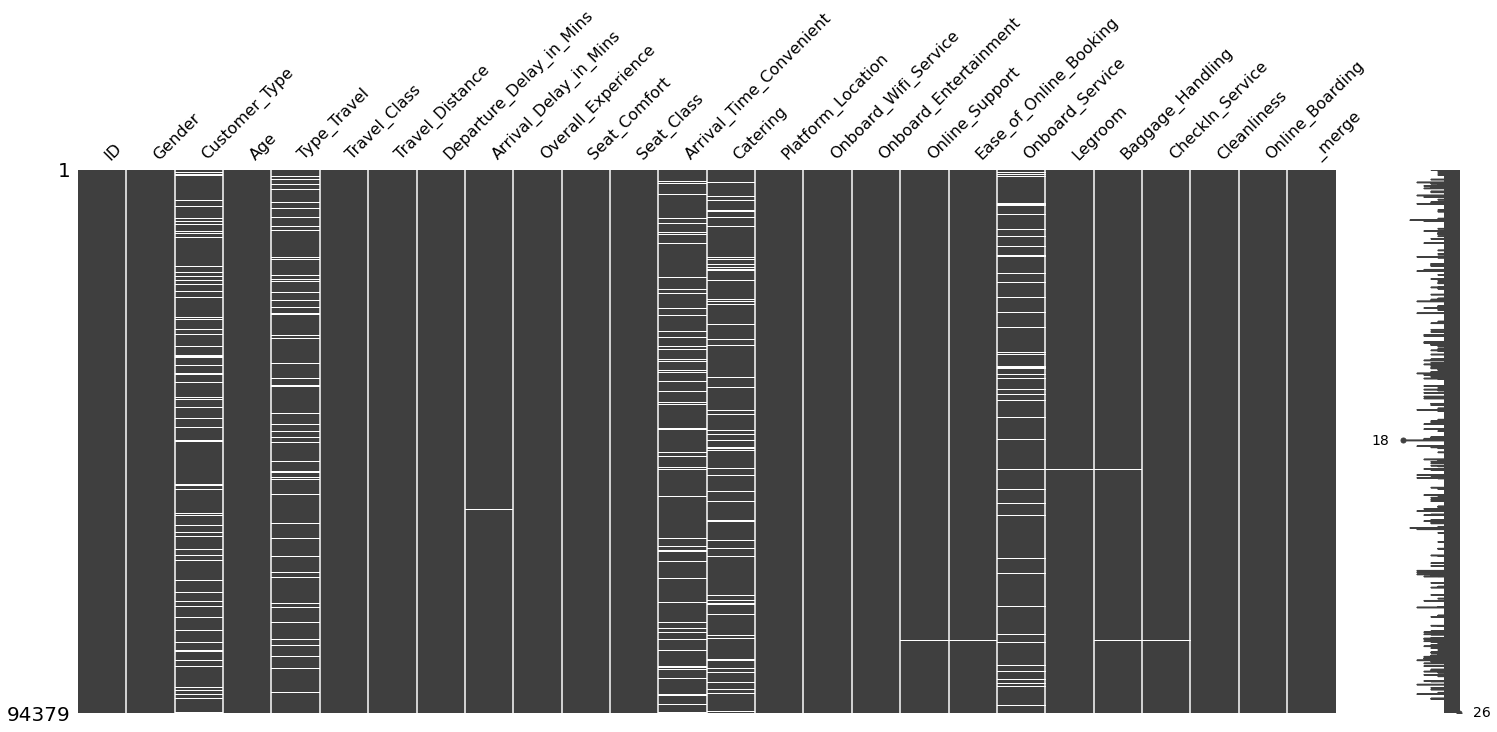

In [87]:
msno.matrix(df)

In [84]:
nona_df = df.dropna() # dropping all rows with a missing value (this should change in the future models)

In [88]:
df.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       '_merge'],
      dtype='object')

In [89]:
cols_w_many_nas = ['Customer_Type','Type_Travel','Arrival_Time_Convenient','Catering','Onboard_Service']

In [90]:
df['Customer_Type'].value_counts()

Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64

In [95]:
x = df['Customer_Type'].mode().iloc[0]
x

'Loyal Customer'

In [97]:
df['Customer_Type'].fillna(x).value_counts()

Loyal Customer       78774
Disloyal Customer    15605
Name: Customer_Type, dtype: int64

<AxesSubplot:>

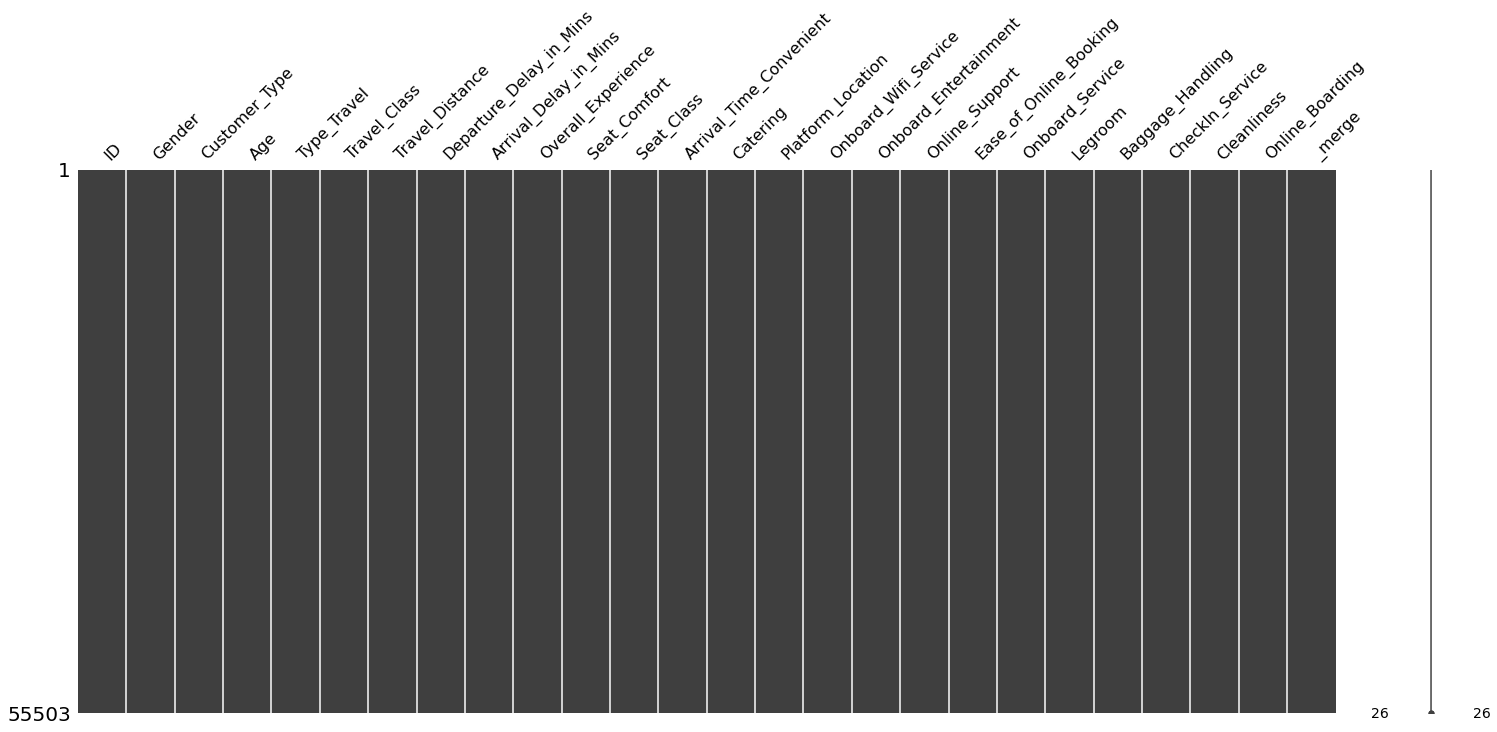

In [86]:
msno.matrix(nona_df)